In [2]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline

plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [6]:
df = pd.read_csv('winequality/winequality-red.csv', ';')

In [7]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df[df.isnull()].count()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

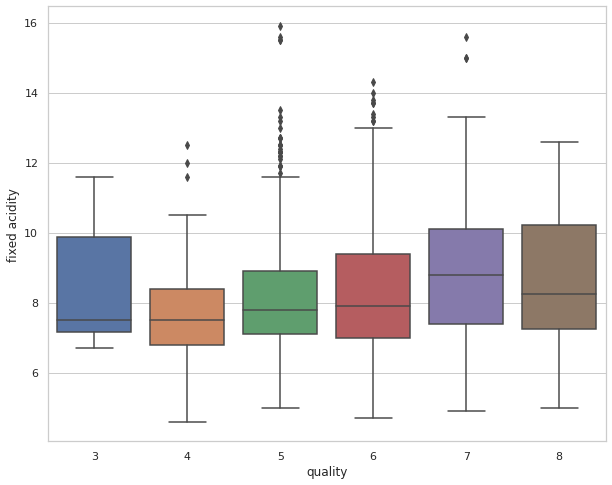

In [10]:
plt.figure(figsize = (10,8))
sns.boxplot(df['quality'],df['fixed acidity'])

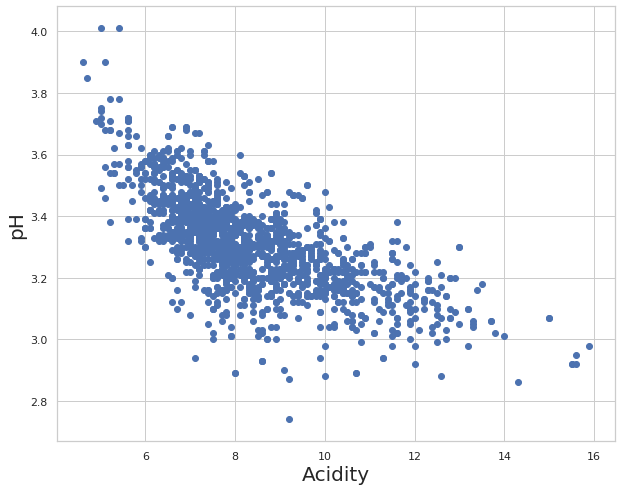

In [11]:
plt.figure(figsize = (10,8))
plt.scatter(df['fixed acidity'],df['pH'])
plt.xlabel('Acidity').set_size(20)
plt.ylabel('pH').set_size(20)

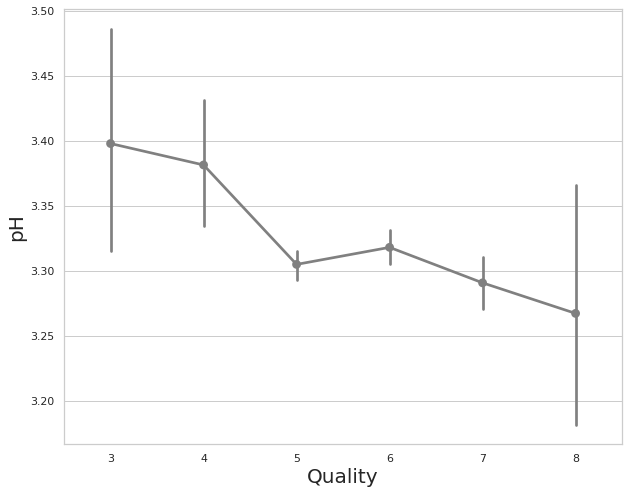

In [12]:
plt.figure(figsize = (10,8))
sns.pointplot(df['quality'],df['pH'],color = 'grey')
plt.xlabel('Quality').set_size(20)
plt.ylabel('pH').set_size(20)

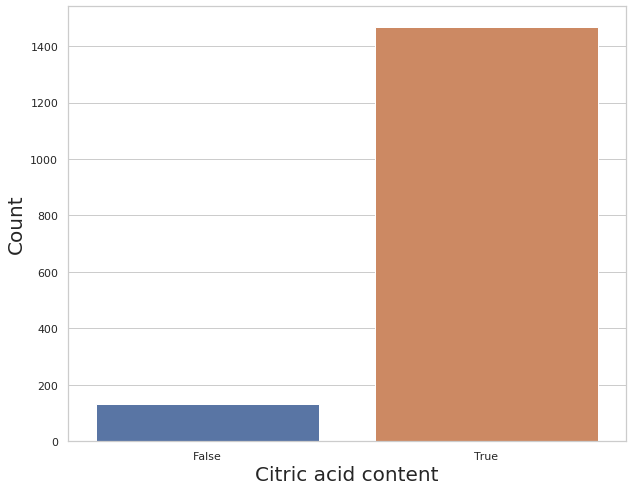

In [18]:
plt.figure(figsize = (10,8))
sns.countplot(df['citric acid'] > 0)
plt.xlabel('Citric acid content').set_size(20)
plt.ylabel('Count').set_size(20)

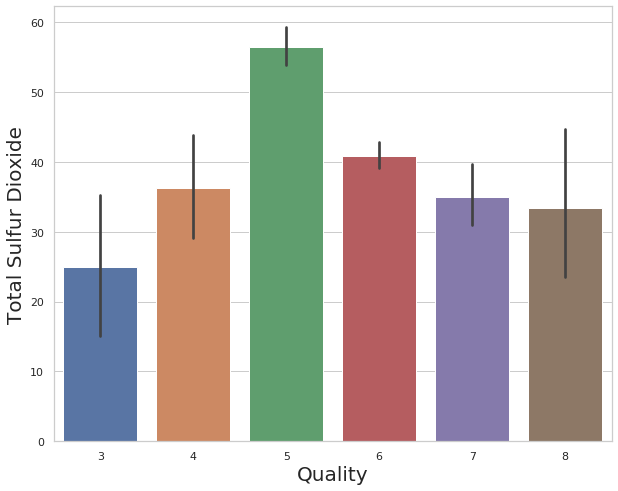

In [19]:
plt.figure(figsize = (10,8))
sns.barplot(df['quality'],df['total sulfur dioxide'])
plt.xlabel('Quality').set_size(20)
plt.ylabel('Total Sulfur Dioxide').set_size(20)

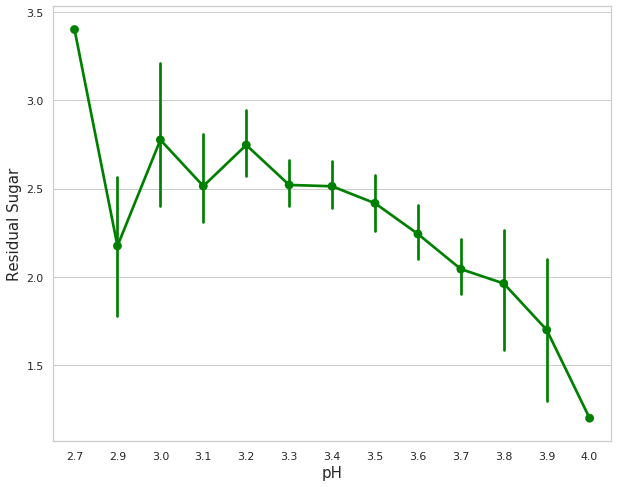

In [20]:
plt.figure(figsize = (10,8))
sns.pointplot(df['pH'].round(1),df['residual sugar'], color = 'green')
plt.xlabel('pH').set_size(15)
plt.ylabel('Residual Sugar').set_size(15)

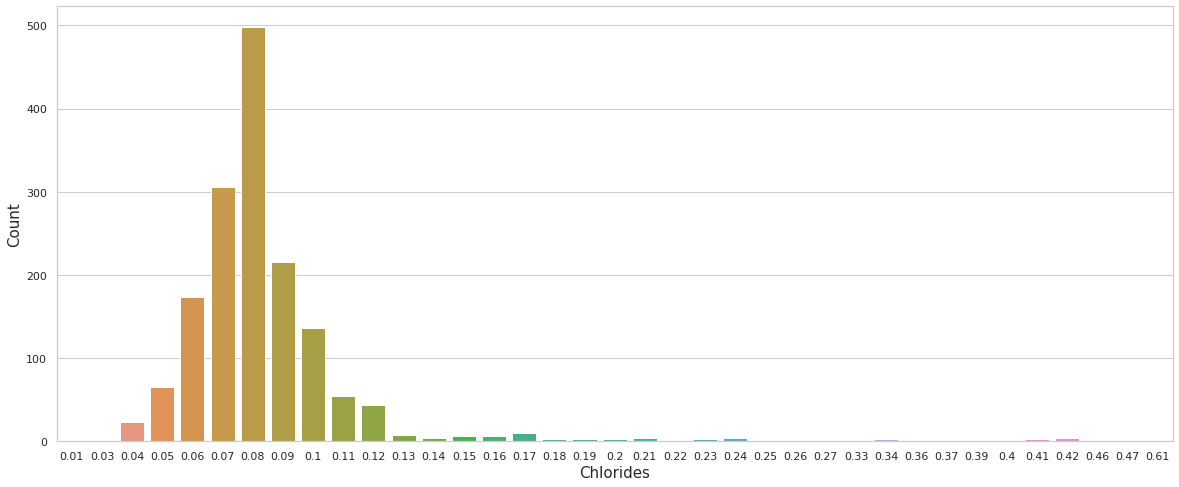

In [22]:
plt.figure(figsize = (20,8))
sns.countplot(x = df['chlorides'].round(2))
plt.xlabel('Chlorides').set_size(15)
plt.ylabel('Count').set_size(15)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
scaler.fit(df.drop(['quality'],axis = 1))
scaler_feat = scaler.transform(df.drop(['quality'],axis = 1))
wine_scaled = pd.DataFrame(scaler_feat,columns = df.columns[:-1])

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [29]:
X = wine_scaled
y = df['quality']

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [37]:
lr.fit(X_train,y_train)

/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
lr_pred = lr.predict(X_test)

In [40]:
lr_conf_matrix = pd.DataFrame(data=metrics.confusion_matrix(y_test,lr_pred),index=[[3,4,5,6,7,8]], columns=[[3,4,5,6,7,8]])
print("Confusion Matrix:")
lr_conf_matrix

Confusion Matrix:


,3,4,5,6,7,8
3,0,0,4,1,0,0
4,0,0,10,6,0,0
5,0,0,152,64,1,0
6,0,0,60,117,5,0
7,0,0,3,45,6,0
8,0,0,0,4,2,0


In [41]:
lr_as = metrics.accuracy_score(y_test,lr_pred)
print("Accuracy Score: {}\n\n".format(lr_as))
print("Classification Report: \n{}".format(metrics.classification_report(y_test,lr_pred)))

Accuracy Score: 0.5729166666666666


Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        16
           5       0.66      0.70      0.68       217
           6       0.49      0.64      0.56       182
           7       0.43      0.11      0.18        54
           8       0.00      0.00      0.00         6

    accuracy                           0.57       480
   macro avg       0.26      0.24      0.24       480
weighted avg       0.54      0.57      0.54       480



/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dtc = DecisionTreeClassifier()

In [44]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [45]:
dtc_pred = dtc.predict(X_test)

In [46]:
dtc_conf_matrix = pd.DataFrame(data=metrics.confusion_matrix(y_test,dtc_pred),index=[[3,4,5,6,7,8]], columns=[[3,4,5,6,7,8]])
print("Confusion Matrix: ")
dtc_conf_matrix

Confusion Matrix: 


,3,4,5,6,7,8
3,0,0,1,3,1,0
4,0,0,6,8,2,0
5,1,10,133,69,4,0
6,0,5,52,102,21,2
7,0,1,3,18,32,0
8,0,0,0,3,3,0


In [47]:
dtc_as = metrics.accuracy_score(y_test,dtc_pred)
print("Accuracy Score: {}\n\n".format(dtc_as))
print("Classification Report: \n{}".format(metrics.classification_report(y_test,dtc_pred)))

Accuracy Score: 0.55625


Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        16
           5       0.68      0.61      0.65       217
           6       0.50      0.56      0.53       182
           7       0.51      0.59      0.55        54
           8       0.00      0.00      0.00         6

    accuracy                           0.56       480
   macro avg       0.28      0.29      0.29       480
weighted avg       0.56      0.56      0.55       480



In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rfc = RandomForestClassifier(n_estimators = 20)

In [53]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
rfc_pred = rfc.predict(X_test)

In [57]:
rfc_conf_matrix = pd.DataFrame(data=metrics.confusion_matrix(y_test,rfc_pred),index=[[3,4,5,6,7,8]], columns=[[3,4,5,6,7,8]])
print("Confusion Matrix: ")
rfc_conf_matrix

Confusion Matrix: 


,3,4,5,6,7,8
3,0,1,3,1,0,0
4,0,1,8,7,0,0
5,0,1,154,62,0,0
6,0,0,43,125,14,0
7,0,0,4,25,25,0
8,0,0,0,2,4,0


In [58]:
rfc_as = metrics.accuracy_score(y_test,rfc_pred)
print("Accuracy Score: {}\n\n".format(rfc_as))
print("Classification Report: \n{}".format(metrics.classification_report(y_test,rfc_pred)))

Accuracy Score: 0.6354166666666666


Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.33      0.06      0.11        16
           5       0.73      0.71      0.72       217
           6       0.56      0.69      0.62       182
           7       0.58      0.46      0.52        54
           8       0.00      0.00      0.00         6

    accuracy                           0.64       480
   macro avg       0.37      0.32      0.33       480
weighted avg       0.62      0.64      0.62       480



/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [60]:
knn_pred = knn.predict(X_test)

In [61]:
knn_conf_matrix = pd.DataFrame(data=metrics.confusion_matrix(y_test,knn_pred),index=[[3,4,5,6,7,8]], columns=[[3,4,5,6,7,8]])
print("Confusion Matrix: ")
knn_conf_matrix

Confusion Matrix: 


,3,4,5,6,7,8
3,0,0,3,2,0,0
4,2,2,8,4,0,0
5,2,6,132,65,11,1
6,0,6,43,108,25,0
7,0,0,1,14,36,3
8,0,0,0,1,5,0


In [62]:
knn_as = metrics.accuracy_score(y_test,knn_pred)
print("Accuracy Score: {}\n\n".format(knn_as))
print("Classification Report: \n{}".format(metrics.classification_report(y_test,knn_pred)))

Accuracy Score: 0.5791666666666667


Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.14      0.12      0.13        16
           5       0.71      0.61      0.65       217
           6       0.56      0.59      0.57       182
           7       0.47      0.67      0.55        54
           8       0.00      0.00      0.00         6

    accuracy                           0.58       480
   macro avg       0.31      0.33      0.32       480
weighted avg       0.59      0.58      0.58       480



In [63]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)

/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [64]:
svm_conf_matrix = pd.DataFrame(data=metrics.confusion_matrix(y_test,svm_pred),index=[[3,4,5,6,7,8]], columns=[[3,4,5,6,7,8]])
print("Confusion Matrix: ")
svm_conf_matrix

Confusion Matrix: 


,3,4,5,6,7,8
3,0,0,3,2,0,0
4,0,0,11,5,0,0
5,0,0,154,63,0,0
6,0,0,51,124,7,0
7,0,0,3,32,19,0
8,0,0,0,2,4,0


In [65]:
svm_as = metrics.accuracy_score(y_test,svm_pred)
print("Accuracy Score: {}\n\n".format(svm_as))
print("Classification Report: \n{}".format(metrics.classification_report(y_test,svm_pred)))

Accuracy Score: 0.61875


Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        16
           5       0.69      0.71      0.70       217
           6       0.54      0.68      0.60       182
           7       0.63      0.35      0.45        54
           8       0.00      0.00      0.00         6

    accuracy                           0.62       480
   macro avg       0.31      0.29      0.29       480
weighted avg       0.59      0.62      0.60       480



/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [66]:
summary_table_1_1 = pd.DataFrame([lr_as,dtc_as,rfc_as,knn_as,svm_as],index=['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM'], columns=['Accuracy Score'])
print("Summary Table for Section 1.1")
summary_table_1_1

Summary Table for Section 1.1


,Accuracy Score
Logistic Regression,0.572917
Decision Tree,0.556250
Random Forest,0.635417
KNN,0.579167
SVM,0.618750


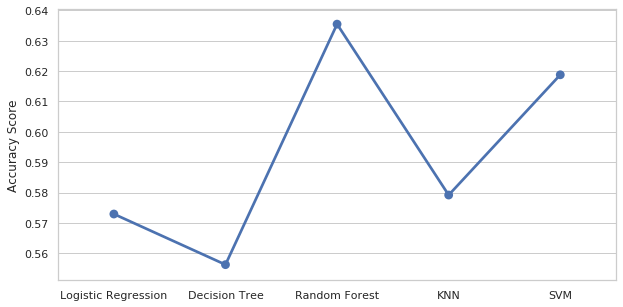

In [67]:
plt.figure(figsize = (10,5))
sns.pointplot(summary_table_1_1.index,summary_table_1_1['Accuracy Score'])

In [69]:
def add_encode(quality): # Encoding for better fit in model
    if quality == 3 or quality == 4:
        return 0
    elif quality == 5 or quality == 6:
        return 1
    else:
        return 2

In [73]:
df['quality encoding'] = df['quality'].apply(add_encode)

In [75]:
df['quality_remarks'] = df['quality encoding'].map({0:'Poor',1:'Average',2:'Good'})

In [92]:
df.drop(['wine encoding'],axis = 1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality encoding,quality_remarks
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,Average
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,Average
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1,Average
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1,Average
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,Average
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1,Average
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,1,Average
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,2,Good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,2,Good
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,1,Average


In [86]:
scaler = StandardScaler()
scaler.fit(df.drop(['quality','quality encoding', 'quality_remarks'],axis=1))
scaled_feat = scaler.transform(df.drop(['quality','quality encoding', 'quality_remarks'],axis=1))
wine_scaled_enc = pd.DataFrame(scaled_feat,columns=df.columns[:-3])

In [87]:
X_enc = wine_scaled_enc
y_enc = df['quality encoding']

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
lr_cross = LogisticRegression()
dtc_cross = DecisionTreeClassifier()
rfc_cross = RandomForestClassifier(n_estimators=20)
knn_cross = KNeighborsClassifier(n_neighbors=1)
svm_grid = SVC()

In [95]:
lr_scores = cross_val_score(lr_cross,X,y,cv=10,scoring='accuracy')
dtc_scores = cross_val_score(dtc_cross,X,y,cv=10,scoring='accuracy')
rfc_scores = cross_val_score(rfc_cross,X,y,cv=10,scoring='accuracy')
knn_scores = cross_val_score(knn_cross,X,y,cv=10,scoring='accuracy')

/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logisti

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
param_grid = {'C':[0.1,1,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

In [99]:
grid = GridSearchCV(svm_grid,param_grid)

In [100]:
grid.fit(X_train,y_train)

/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [1]:
grid_predicitons = grid.predict(X_test)

NameError: name 'grid' is not defined

In [102]:
svm_grid_score = metrics.accuracy_score(y_test,grid_predicitons)

In [103]:
summary_table_1_2 = pd.DataFrame([lr_scores.mean(),dtc_scores.mean(),rfc_scores.mean(),knn_scores.mean(),svm_grid_score],index=['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM'], columns=['Accuracy Score'])
print("Summary Table for Section 1.2")
summary_table_1_2

Summary Table for Section 1.2


,Accuracy Score
Logistic Regression,0.581797
Decision Tree,0.477110
Random Forest,0.557877
KNN,0.486602
SVM,0.616667


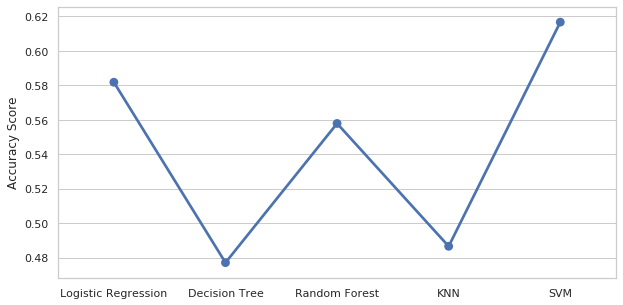

In [104]:
plt.figure(figsize=(10,5))
sns.pointplot(summary_table_1_2.index,summary_table_1_2['Accuracy Score'])

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc, test_size=0.30)
grid_enc = GridSearchCV(svm_grid_enc,param_grid)

In [106]:
grid_enc.fit(X_train,y_train)

/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [107]:
grid_predicitons_enc = grid_enc.predict(X_test)

In [108]:
svm_grid_score_enc = metrics.accuracy_score(y_test,grid_predicitons_enc)

In [110]:
lr_scores_enc = cross_val_score(lr_cross,X_enc,y_enc,cv=10,scoring='accuracy')
dtc_scores_enc = cross_val_score(dtc_cross,X_enc,y_enc,cv=10,scoring='accuracy')
rfc_scores_enc = cross_val_score(rfc_cross,X_enc,y_enc,cv=10,scoring='accuracy')
knn_scores_enc = cross_val_score(knn_cross,X_enc,y_enc,cv=10,scoring='accuracy')

/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logisti

In [111]:
summary_table_2 = pd.DataFrame([lr_scores_enc.mean(),dtc_scores_enc.mean(),rfc_scores_enc.mean(),knn_scores_enc.mean(),svm_grid_score_enc],index=['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM'], columns=['Accuracy Score'])
print("Summary Table for Section 2")
summary_table_2

Summary Table for Section 2


,Accuracy Score
Logistic Regression,0.966245
Decision Tree,1.000000
Random Forest,1.000000
KNN,0.991261
SVM,1.000000


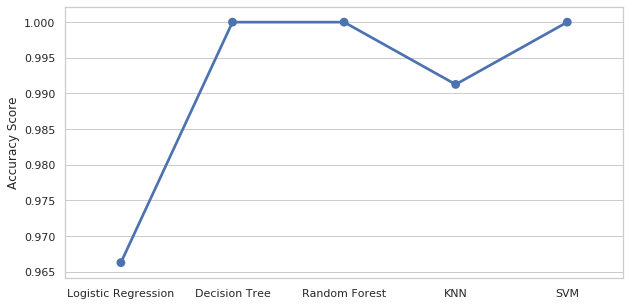

In [112]:
plt.figure(figsize=(10,5))
sns.pointplot(summary_table_2.index,summary_table_2['Accuracy Score'])

In [113]:
overall_summary = pd.concat([summary_table_1_1,summary_table_1_2,summary_table_2],axis=1)
overall_summary.columns = ['Without Encoding, Hold-Out','Without Encoding, K-fold','With Encoding']

In [114]:
overall_summary

,"Without Encoding, Hold-Out","Without Encoding, K-fold",With Encoding
Logistic Regression,0.572917,0.581797,0.966245
Decision Tree,0.556250,0.477110,1.000000
Random Forest,0.635417,0.557877,1.000000
KNN,0.579167,0.486602,0.991261
SVM,0.618750,0.616667,1.000000


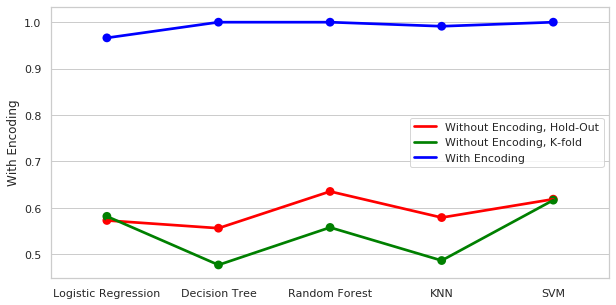

In [115]:
plt.figure(figsize=(10,5))
ax = sns.pointplot(overall_summary.index,overall_summary['Without Encoding, Hold-Out'],color='red')
ax = sns.pointplot(overall_summary.index,overall_summary['Without Encoding, K-fold'],color='green')
ax = sns.pointplot(overall_summary.index,overall_summary['With Encoding'],color='blue')
ax.legend(handles=ax.lines[::len(overall_summary)+1], labels=["Without Encoding, Hold-Out","Without Encoding, K-fold","With Encoding"])